# **EV_India Dataset**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')


In [ ]:
df1 = pd.read_csv('/content/EV_4_India_dataset.csv')
df1.head()

,Car,Style,Range,Transmission,VehicleType,PriceRange,Capacity,BootSpace,BaseModel,TopModel
0,Tata Nexon EV,Compact SUV,312 Km/Full Charge,Automatic,Electric,₹ 13.99 - 17.4 L,5 Seater,350 L,XM,Dark XZ Plus LUX
1,Tata Tigor EV,Subcompact Sedan,306 Km/Full Charge,Automatic,Electric,₹ 12.49 - 13.64 L,5 Seater,316 L,XE,XZ Plus Dual Tone
2,Tata Nexon EV Max,Compact SUV,437 Km/Full Charge,Automatic,Electric,₹ 17.74 - 19.24 L,5 Seater,350 L,XZ Plus 3.3 kW,XZ Plus Lux 7.2 kW
3,MG ZS EV,Compact SUV,419 Km/Full Charge,Automatic,Electric,₹ 21.99 - 25.88 L,5 Seater,448 L,Excite,Exclusive
4,Hyundai Kona Electric,Compact SUV,452 Km/Full Charge,Automatic,Electric,₹ 23.79 - 23.98 L,5 Seater,na,Premium Dual Tone,HSE


In [ ]:
df1.shape

(12, 10)

In [ ]:
df1.columns

Index(['Car', 'Style', 'Range', 'Transmission', 'VehicleType', 'PriceRange',
       'Capacity', 'BootSpace', 'BaseModel', 'TopModel'],
      dtype='object')

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Car           12 non-null     object
 1   Style         12 non-null     object
 2   Range         12 non-null     object
 3   Transmission  12 non-null     object
 4   VehicleType   12 non-null     object
 5   PriceRange    12 non-null     object
 6   Capacity      12 non-null     object
 7   BootSpace     12 non-null     object
 8   BaseModel     12 non-null     object
 9   TopModel      12 non-null     object
dtypes: object(10)
memory usage: 1.1+ KB


In [ ]:
df1.isnull().sum()

Car             0
Style           0
Range           0
Transmission    0
VehicleType     0
PriceRange      0
Capacity        0
BootSpace       0
BaseModel       0
TopModel        0
dtype: int64

In [ ]:
df1.describe()

,Car,Style,Range,Transmission,VehicleType,PriceRange,Capacity,BootSpace,BaseModel,TopModel
count,12,12,12,12,12,12,12,12,12,12
unique,12,7,12,1,1,12,2,8,9,7
top,Tata Nexon EV,Compact SUV,312 Km/Full Charge,Automatic,Electric,₹ 13.99 - 17.4 L,5 Seater,na,na,na
freq,1,6,1,12,12,1,11,4,4,6


# **Exploratory Data Analysis**

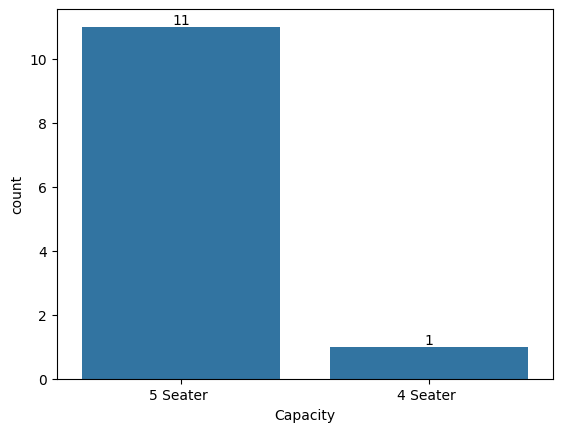

In [ ]:
b1 = sns.countplot(x='Capacity', data=df1)
for bars in b1.containers:
  b1.bar_label(bars)

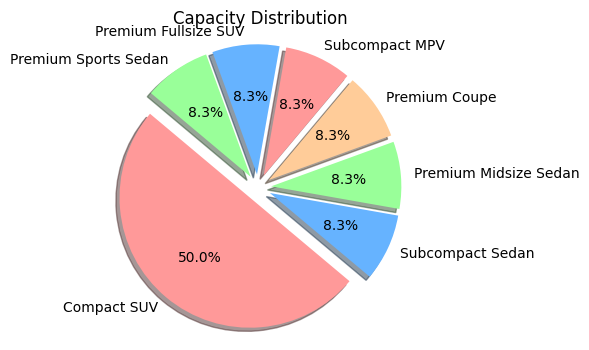

In [ ]:
# Customizing the Pie Chart
plt.figure(figsize=(4, 4))

# Get the counts for each category
counts = df1['Style'].value_counts()

# Define custom colors
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']

# Ensure the length of explode matches the number of categories
explode = [0.1] * len(counts)  # Explode all wedges equally

# Create the pie chart
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140, colors=colors, explode=explode, shadow=True)

plt.title('Capacity Distribution')

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

plt.show()


In [ ]:
pvt_table = df1.pivot_table(index='PriceRange', values='Car', aggfunc='sum').reset_index()
pvt_table.sort_values(by='Car', ascending=False, inplace=True)
pvt_table


,PriceRange,Car
6,₹ 12.49 - 13.64 L,Tata Tigor EV
8,₹ 17.74 - 19.24 L,Tata Nexon EV Max
7,₹ 13.99 - 17.4 L,Tata Nexon EV
4,₹ 1.5 Cr,Porsche Taycan
0,₹ 1 Cr,Mercedes-Benz EQC
9,₹ 21.99 - 25.88 L,MG ZS EV
2,₹ 1.06 - 1.12 Cr,Jaguar I-Pace
10,₹ 23.79 - 23.98 L,Hyundai Kona Electric
11,₹ 29.15 L,BYD E6
3,₹ 1.16 Cr,BMW iX


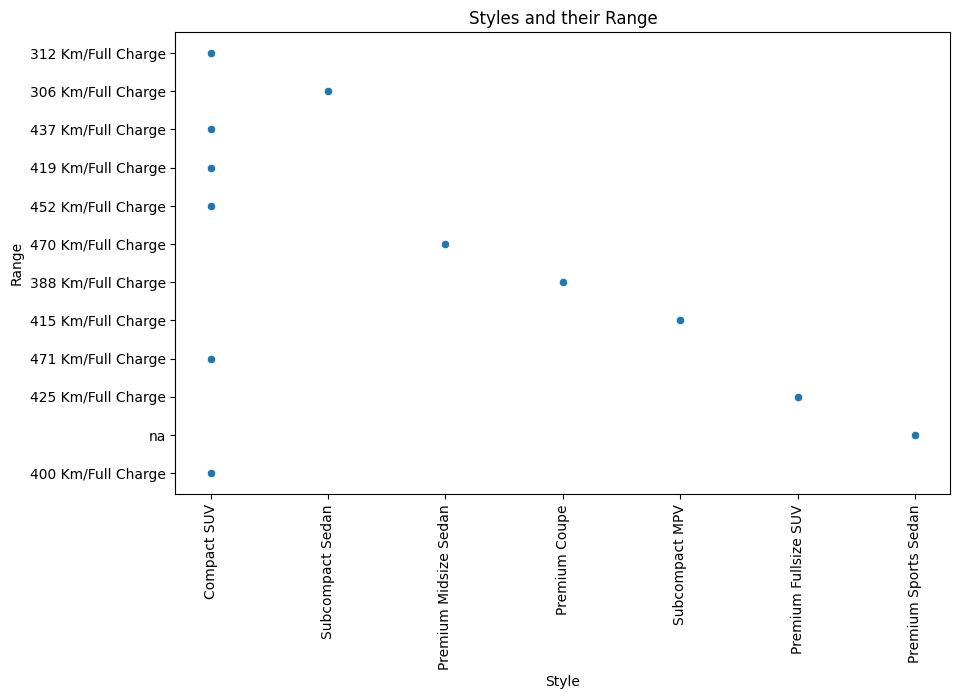

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df1, x='Style', y='Range')
plt.xlabel('Style')
plt.ylabel('Range')
plt.title('Styles and their Range')
# Rotate x-axis labels vertically
plt.xticks(rotation=90)
plt.show()


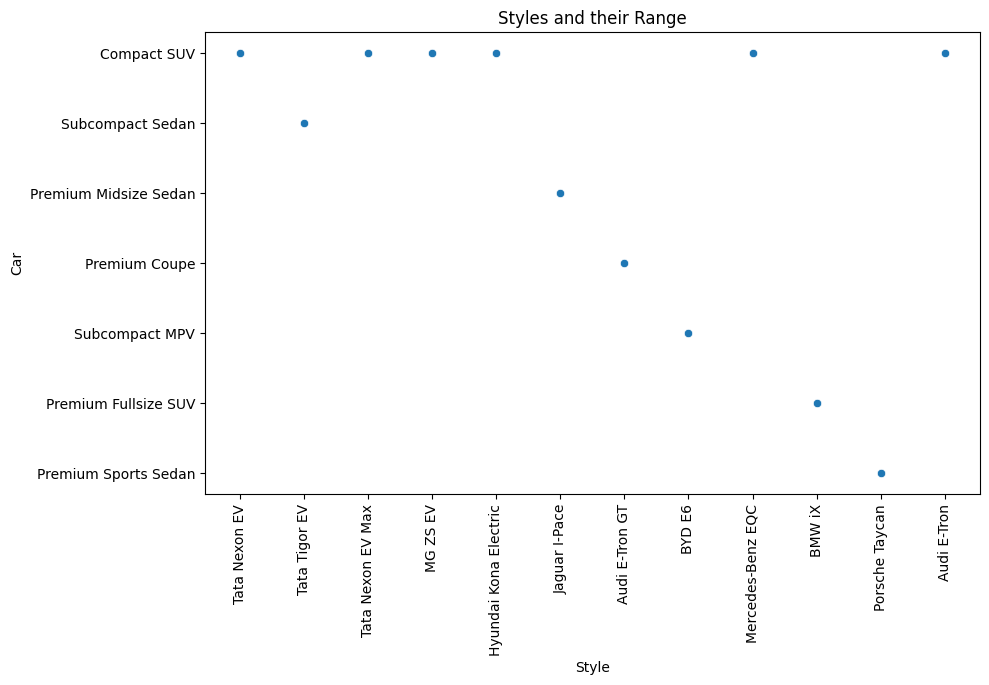

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df1, x='Car', y='Style')
plt.xlabel('Style')
plt.ylabel('Car')
plt.title('Styles and their Range')
# Rotate x-axis labels vertically
plt.xticks(rotation=90)
plt.show()


# **Conclusion**

In the market most preferd style is Compact SUV and the best car available is E-Tron.

# **EV_Model Dataset**

In [ ]:
df2= pd.read_csv('/content/Ev_5_model_dataset.csv')
df2.head()

,Model Name,Price,Riding Range (km),Top Speed (kmph),Weight (kg),Battery Charging Time (hrs),Rated Power (W)
0,Ampere Magnus EX,104758,121,53,90,7,1200
1,Ampere Magnus Pro,66053,45,25,94,10,250
2,Ampere REO,61993,45,25,88,10,250
3,Ampere Zeal,96544,120,53,80,7,1200
4,Ather 450X,135489,111,90,108,8,3000


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Model Name                   39 non-null     object
 1   Price                        39 non-null     int64 
 2   Riding Range (km)            39 non-null     int64 
 3   Top Speed (kmph)             39 non-null     int64 
 4   Weight (kg)                  39 non-null     int64 
 5   Battery Charging Time (hrs)  39 non-null     int64 
 6   Rated Power (W)              39 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 2.3+ KB


In [ ]:
pd.isnull(df2).sum()

Model Name                     0
Price                          0
Riding Range (km)              0
Top Speed (kmph)               0
Weight (kg)                    0
Battery Charging Time (hrs)    0
Rated Power (W)                0
dtype: int64

In [ ]:
df2.describe()

,Price,Riding Range (km),Top Speed (kmph),Weight (kg),Battery Charging Time (hrs),Rated Power (W)
count,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000
mean,94763.897436,100.666667,49.717949,98.846154,5.410256,1364.102564
std,30861.662954,34.834446,23.557264,29.030418,1.665722,1302.777838
min,51094.000000,45.000000,25.000000,59.000000,3.000000,250.000000
25%,69553.500000,79.500000,25.000000,78.000000,4.000000,250.000000
50%,90282.000000,90.000000,48.000000,93.000000,5.000000,1000.000000
75%,109809.000000,120.500000,64.000000,112.500000,6.000000,1950.000000
max,171250.000000,180.000000,116.000000,150.000000,10.000000,5500.000000


# **Exploratory Data Analysis**

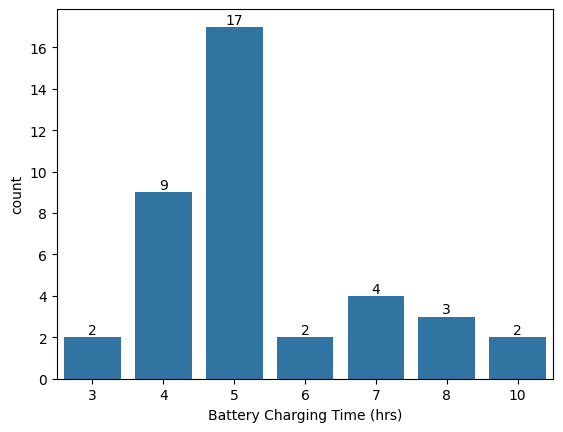

In [ ]:
b1 = sns.countplot(x='Battery Charging Time (hrs)', data=df2)
for bars in b1.containers:
  b1.bar_label(bars)

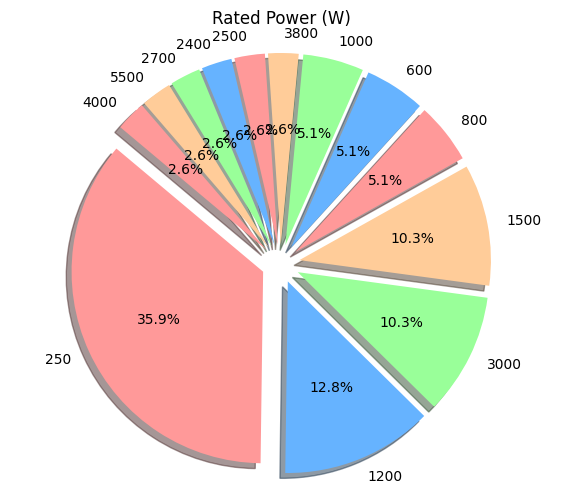

In [ ]:
# Customizing the Pie Chart
plt.figure(figsize=(7, 6))

# Get the counts for each category
counts = df2['Rated Power (W)'].value_counts()

# Define custom colors
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']

# Ensure the length of explode matches the number of categories
explode = [0.1] * len(counts)  # Explode all wedges equally

# Create the pie chart
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140, colors=colors, explode=explode, shadow=True)

plt.title('Rated Power (W)')

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

plt.show()


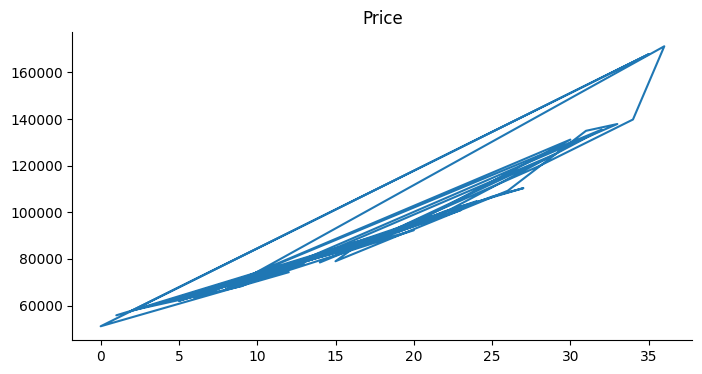

In [ ]:
pvt_tbl['Price'].plot(kind='line', figsize=(8, 4), title='Price')
plt.gca().spines[['top', 'right']].set_visible(False)

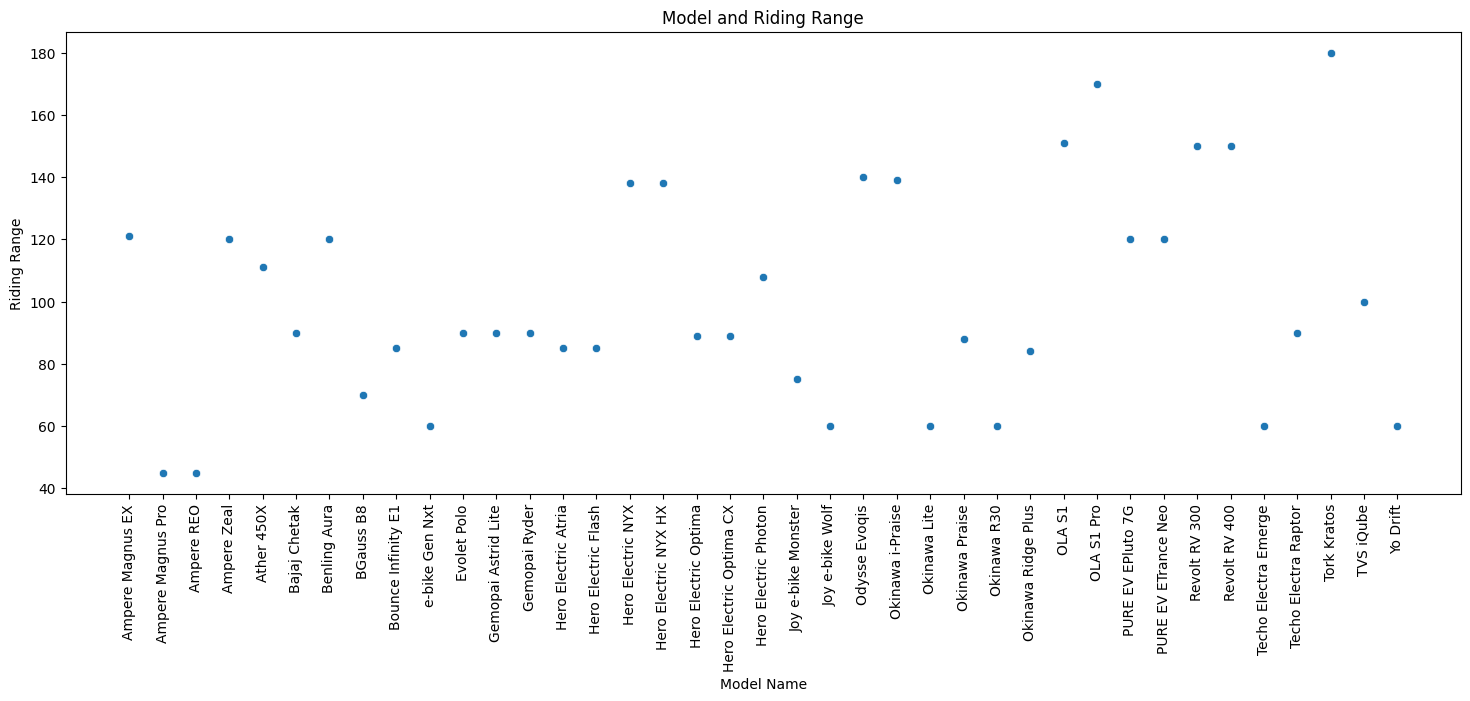

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 6))
sns.scatterplot(data=df2, x='Model Name', y='Riding Range (km)')
plt.xlabel('Model Name')
plt.ylabel('Riding Range')
plt.title('Model and Riding Range')

# Rotate x-axis labels vertically
plt.xticks(rotation=90)

plt.show()


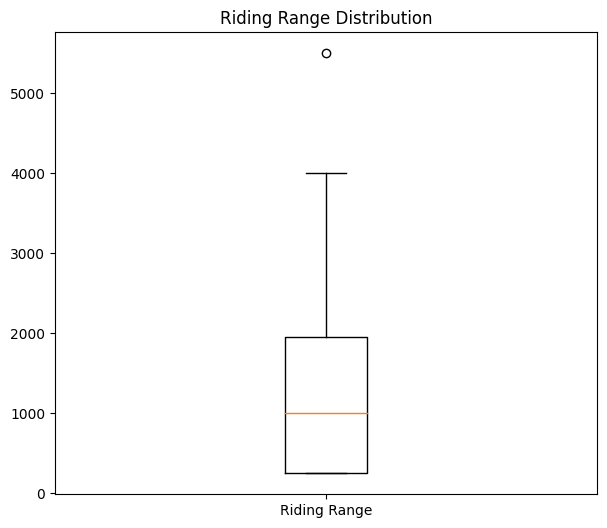

In [ ]:
plt.figure(figsize=(7, 6))
plt.boxplot(df2['Rated Power (W)'])
plt.xticks([1], ['Riding Range'])
plt.title('Riding Range Distribution')
plt.show()


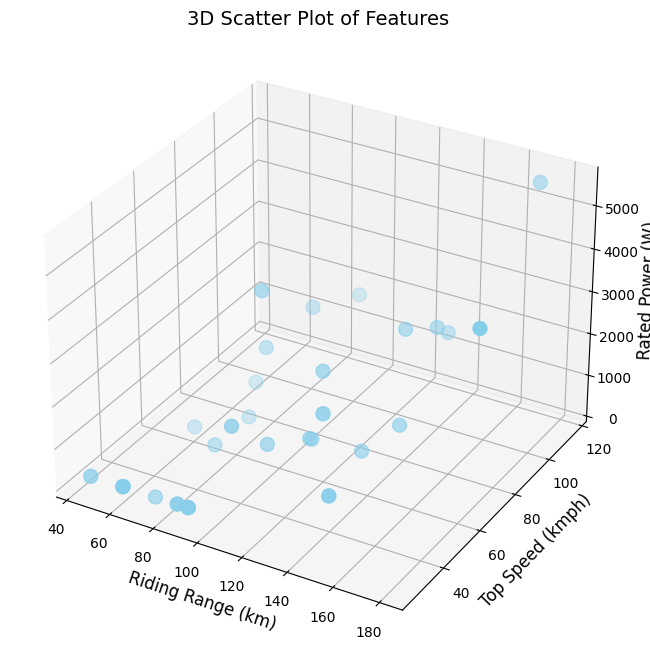

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

x_data = df2['Riding Range (km)']
y_data = df2['Top Speed (kmph)']
z_data = df2['Rated Power (W)']

# Customize marker style and color
ax.scatter(x_data, y_data, z_data, c='skyblue', marker='o', s=100)

# Customize labels
ax.set_xlabel('Riding Range (km)', fontsize=12)
ax.set_ylabel('Top Speed (kmph)', fontsize=12)
ax.set_zlabel('Rated Power (W)', fontsize=12)

# Customize title
plt.title('3D Scatter Plot of Features', fontsize=14)

# Customize grid
ax.grid(True)

plt.show()
